In [1]:
%%bash
# The following line ensures that cell runs only in Google Colab
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
echo "You are running in colab, getting data"
wget -q https://github.com/paulyurlov/DataVisualization/archive/main.zip
unzip -qq main.zip DataVisualization-main/Data/*
rm -rf Data/ main.zip
cp -r DataVisualization-main/Data/. Data/
rm -rf DataVisualization-main/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from numpy.random import default_rng


plt.style.use("ggplot")

# Задание 1

In [3]:
df = pd.read_csv("Data/Experiment - obval2.txt", sep=" ")
df.columns=['time'] + df.columns.tolist()[1:]
df

,time,device1,device2,device3,device4,device5,device6,device7,device8
0,1,1.04494,-0.098603,0.019308,-0.208122,0.012113,0.203970,NaN,NaN
1,2,1.05213,-0.095805,0.021307,-0.206922,0.023305,0.203170,NaN,NaN
2,3,1.08611,-0.085013,0.028902,-0.204923,0.034897,0.201972,NaN,NaN
3,4,1.15845,-0.064230,0.043290,-0.200527,0.044090,0.199973,NaN,NaN
4,5,1.27357,-0.032653,0.063675,-0.194132,0.057680,0.197175,NaN,NaN
...,...,...,...,...,...,...,...,...,...
131224,131225,3.36280,0.456980,0.370645,-0.108197,0.032098,0.201972,NaN,NaN
131225,131226,3.44554,0.487357,0.391030,-0.103000,0.042890,0.200772,NaN,NaN
131226,131227,3.51948,0.514937,0.410615,-0.098203,0.054882,0.197175,NaN,NaN
131227,131228,3.58384,0.540517,0.427402,-0.094207,0.064075,0.193977,NaN,NaN


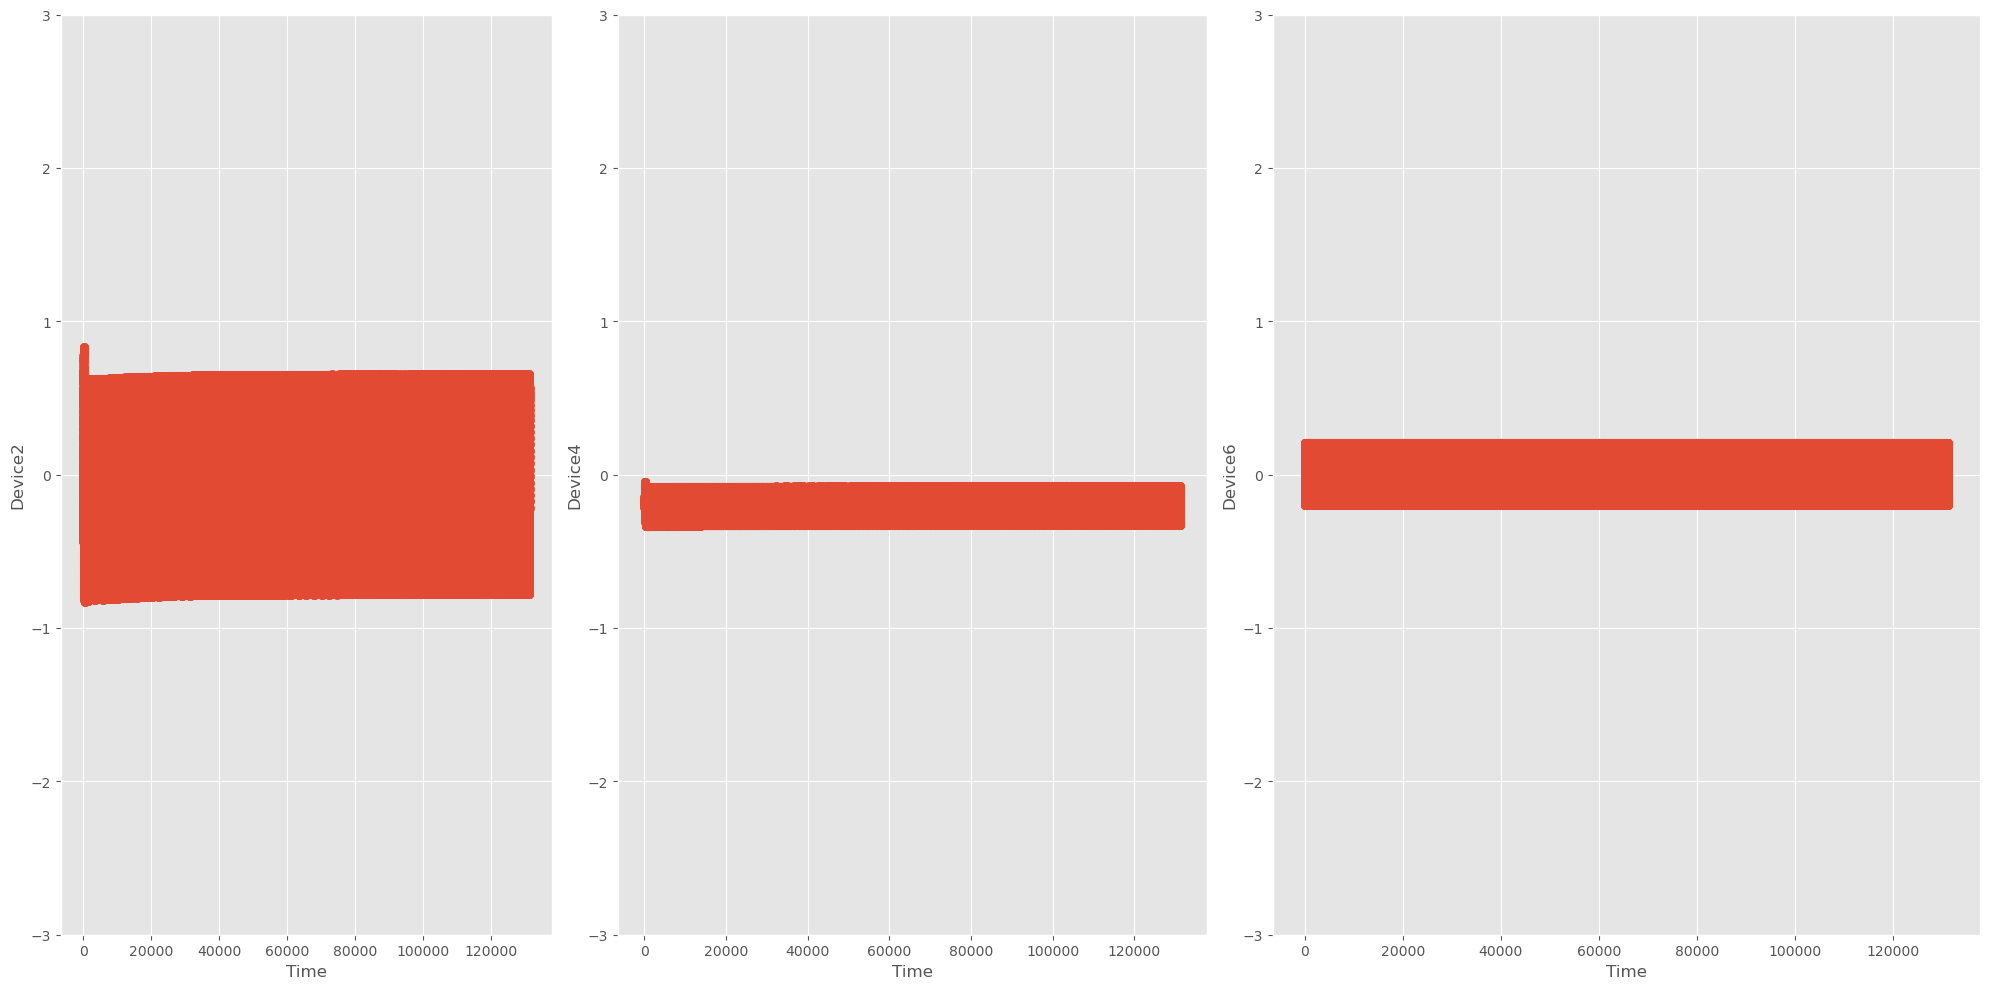

In [4]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1.2, 1.44]}, figsize=(20, 10))


ax[0].scatter(df['time'], df['device2'])
ax[0].set_ylim(-3, 3)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Device2")


ax[1].scatter(df['time'], df['device4'])
ax[1].set_ylim(-3, 3)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Device4")



ax[2].scatter(df['time'], df['device6'])
ax[2].set_ylim(-3, 3)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Device6")

fig.tight_layout()

# Задание 2

In [5]:
df = pd.read_csv("Data/city_russia.csv")
df

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


Text(0.5, 1.0, 'Гистограма вероятности population')

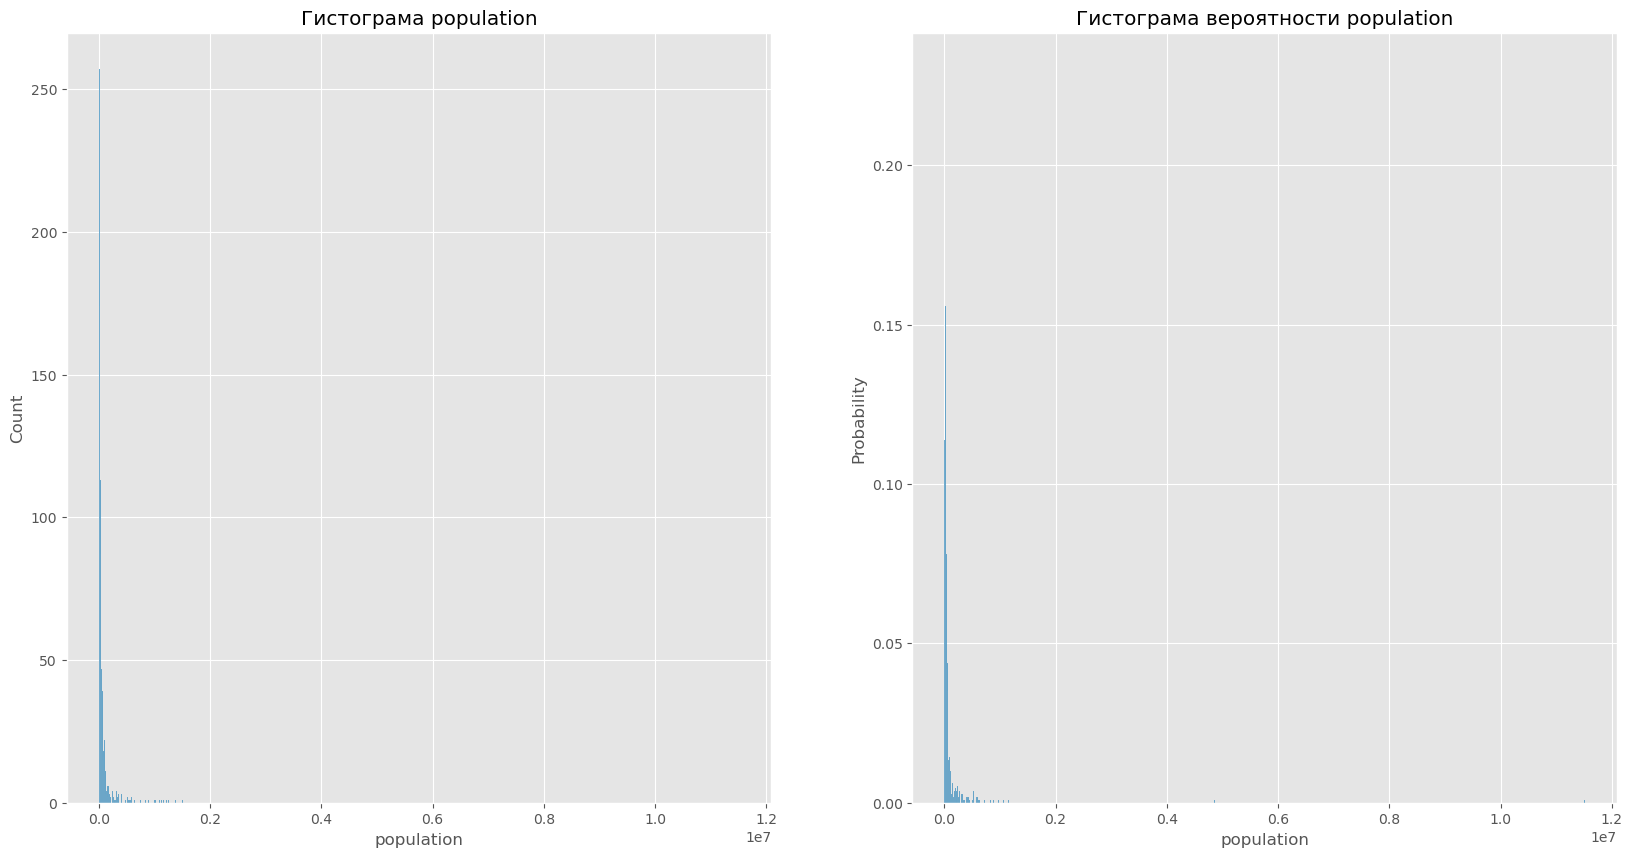

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(df.population, ax=ax[0], stat='count')
ax[0].set_title('Гистограма population')

sns.histplot(df.population, ax=ax[1], stat='probability')
ax[1].set_title('Гистограма вероятности population')

Text(0.5, 0, 'log population')

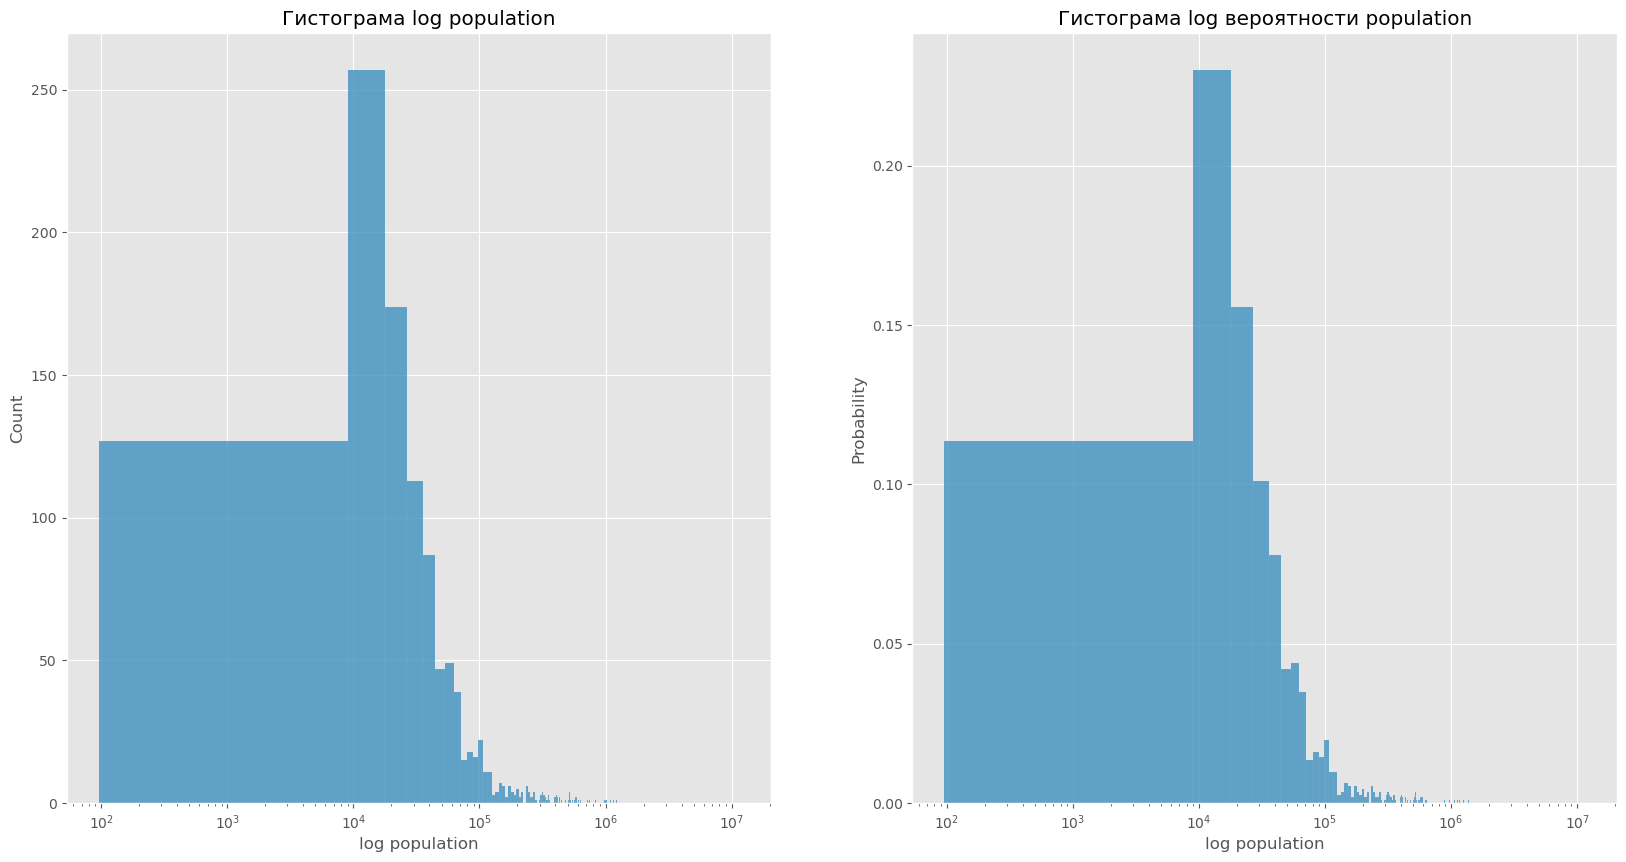

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(df.population, ax=ax[0], stat='count')
ax[0].set_title('Гистограма log population')
ax[0].set_xscale('log')
ax[0].set_xlabel('log population')

sns.histplot(df.population, ax=ax[1], stat='probability')
ax[1].set_title('Гистограма log вероятности population')
ax[1].set_xscale('log')
ax[1].set_xlabel('log population')

# Задание 3

Text(0.5, 0, 'log population')

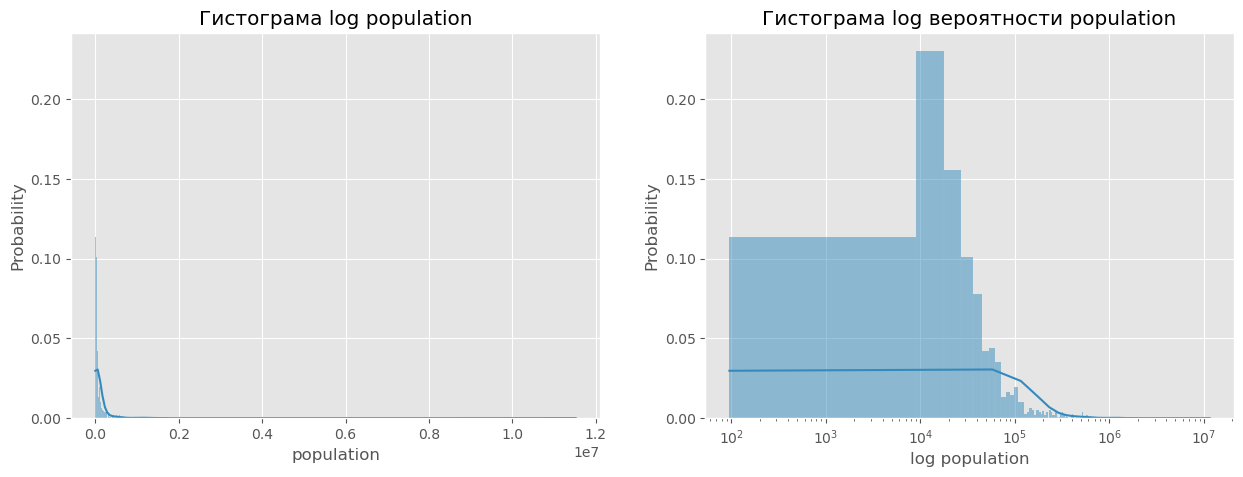

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.population, ax=ax[0], kde=True, stat='probability')
ax[0].set_title('Гистограма log population')

sns.histplot(df.population, ax=ax[1], kde=True, stat='probability')
ax[1].set_title('Гистограма log вероятности population')
ax[1].set_xscale('log')
ax[1].set_xlabel('log population')

<AxesSubplot:ylabel='Count'>

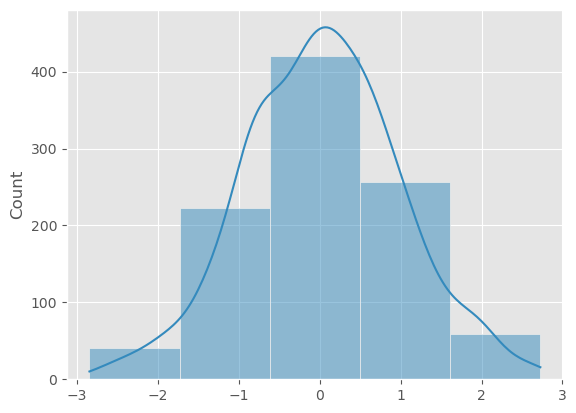

In [9]:
r = norm.rvs(size=1000)
sns.histplot(r, kde=True, bins=5)

# Задание 4

<AxesSubplot:xlabel='Age', ylabel='Count'>

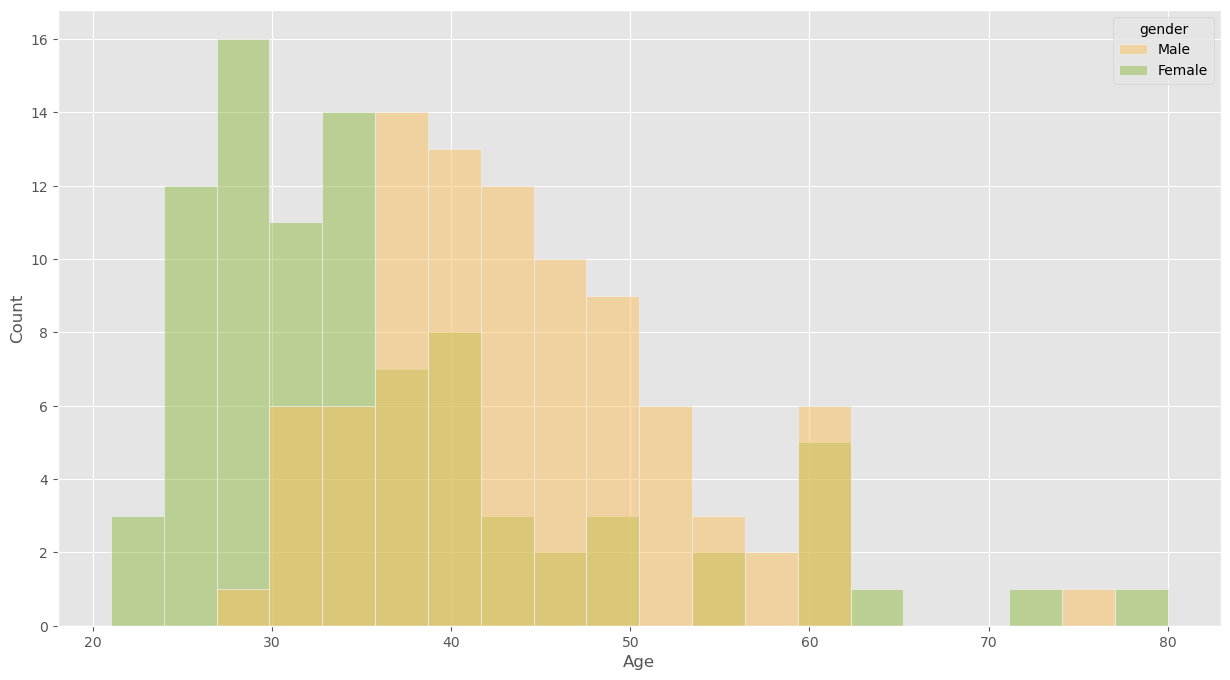

In [10]:
df_m = pd.read_csv('Data/oscar_age_male.csv', sep=",", quotechar='"',
                      skipinitialspace=True)
df_m['gender'] = 'Male'
df_f = pd.read_csv('Data/oscar_age_female.csv', sep=",", quotechar='"',
                      skipinitialspace=True)
df_f['gender'] = 'Female'
df = pd.concat([df_m, df_f], axis=0)
df.reset_index(inplace=True)


plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Age', hue='gender', palette=["C4", "C5"], bins=20)

# Задание 5

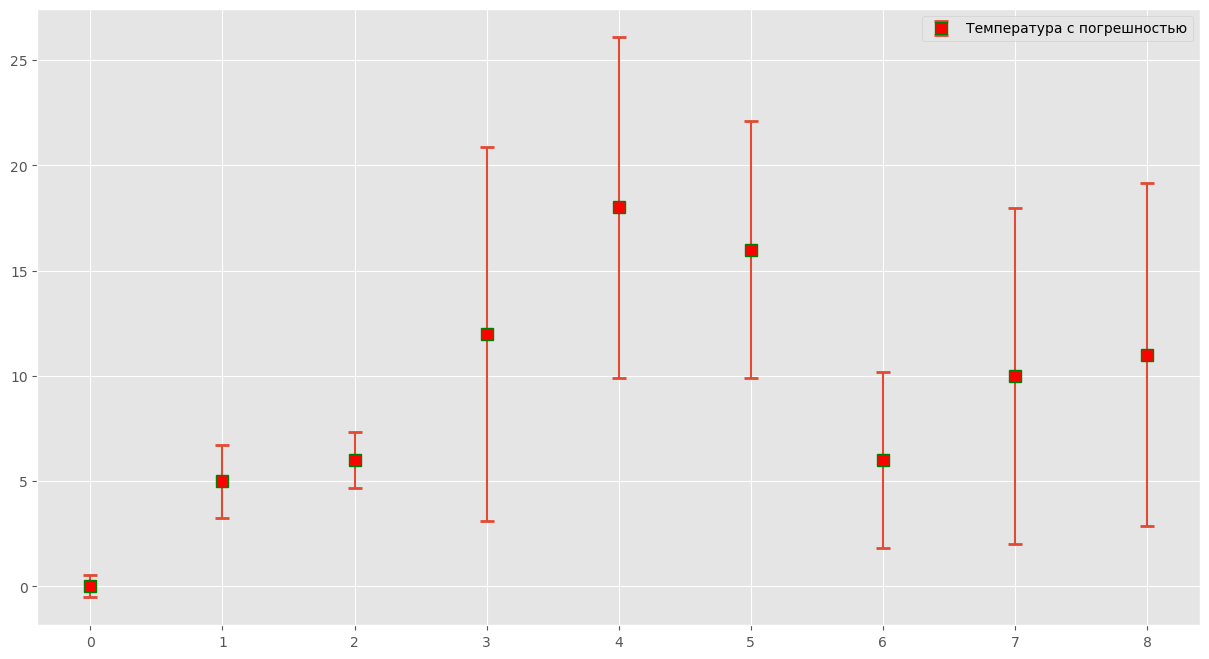

In [11]:
t = np.array([0,5,6,12,18,16,6,10,11])
plt.figure(figsize=(15,8))
err = np.random.uniform(0, 9,size=9)
plt.errorbar(np.arange(t.shape[0]), t, yerr = err, linestyle='none', capsize=5, mfc='red',
         mec='green', markersize=8, capthick=2, marker='s', label='Температура с погрешностью')
plt.legend()

# Задание 6

In [12]:
df = pd.read_csv('Data/mlb_players.csv', nrows=1034, quotechar='"',
                      skipinitialspace=True)
df

,Name,Team,Position,Height(inches),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180.0,22.99
1,Paul Bako,BAL,Catcher,74,215.0,34.69
2,Ramon Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin Millar,BAL,First Baseman,72,210.0,35.43
4,Chris Gomez,BAL,First Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad Thompson,STL,Relief Pitcher,73,190.0,25.08
1030,Tyler Johnson,STL,Relief Pitcher,74,180.0,25.73
1031,Chris Narveson,STL,Relief Pitcher,75,205.0,25.19
1032,Randy Keisler,STL,Relief Pitcher,75,190.0,31.01


<AxesSubplot:xlabel='Height(inches)', ylabel='Age'>

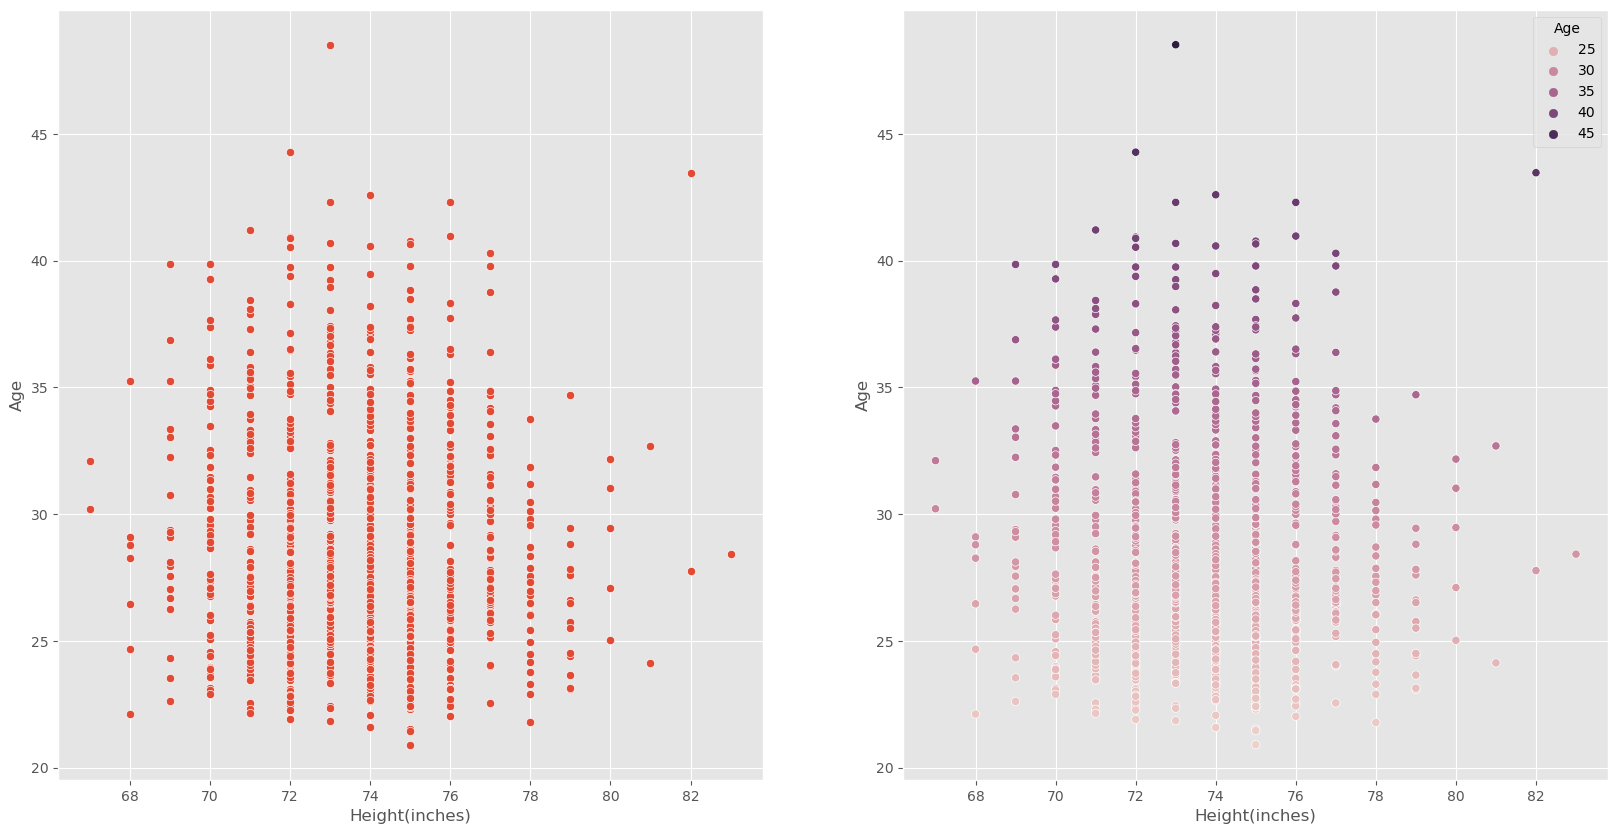

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.scatterplot(data=df, x='Height(inches)', y='Age', ax=ax[0])
sns.scatterplot(data=df, x='Height(inches)', y='Age', hue='Age', ax=ax[1])

# Задание 7

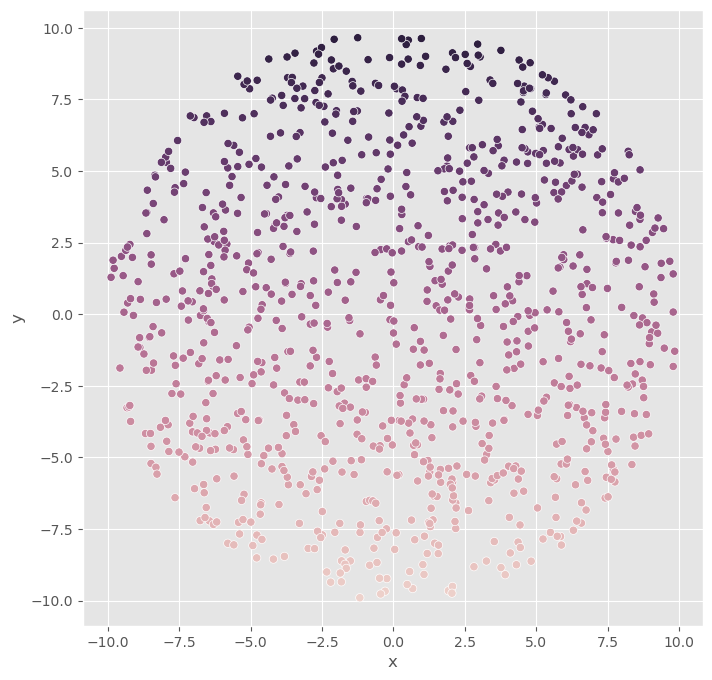

In [14]:
dr = default_rng(42)
circle_r = 10
# center of the circle (x, y)
circle_x = 0
circle_y = 0

# random angle
alpha = 2 * np.pi * dr.random(size=1000)
# random radius
r = circle_r * np.sqrt(dr.random(size=1000))
# calculating coordinates
x = r * np.cos(alpha) + circle_x
y = r * np.sin(alpha) + circle_y

plt.figure(figsize=(8, 8))
sns.scatterplot(x=x, y=y, hue=y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend().set_visible(False)